# Projet

## Description
-
-
-
-
-



### Importer les librairies


In [241]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Stocker les dataframes dans des variables 


In [242]:
df = pd.read_csv('archive/googleplaystore.csv')
df_reviews = pd.read_csv('archive/googleplaystore_user_reviews.csv')

ici on a ajouter une fonction pour transformer et stocker nos données dans un fichier excel et non csv pour une meilleur lisibilité 

In [243]:
fichier_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore.xlsx'
fichier_review_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore_user_reviews.xlsx'

# Pour exporter le fichier en excel pour une meilleur lisibilité
# df.to_excel(fichier_excel, index=False)
# df_reviews.to_excel(fichier_review_excel, index=False)


## I) Exploration

#### a) Shape


In [244]:
print(df.shape)

(10841, 13)


In [245]:
print(df_reviews.shape)

(64295, 5)


#### b) Target

La target est la Colonne Category
#### c) Data Types

In [246]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [247]:
print(df_reviews.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


#### d) INSA
On commence par vérifier si il y a des informations manquantes

In [248]:
print(df.isna().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [249]:
print(df_reviews.isna().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


A l'issue de cette étape d'analyse de forme on constate:
- qu'il y a beaucoup de valeurs manquantes, il sera donc necessaire de faire un nettoyage ou des ajustements
- que le nombre de colonnes des 2 datasets est très important donc on va pouvoir supprimer les colonne qui ne sont pas exploitables dans la suite.

##### 1. Nettoyage du dataset googleplaystore_reviews

In [250]:
df_reviews.dropna(subset=['Translated_Review'], inplace=True)
print(df_reviews.isna().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


##### 2. Nettoyage du dataset googleplaystore

In [251]:
df.dropna(subset=['Rating'], inplace=True)
print(df.isna().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


#### e) Véracité des données

In [252]:
# l'id 10472 a une valuer Rating > 5.0
df_rating_fuzzy = df[df['Rating'] > 5] 
df_rating_fuzzy
df.drop(index=10472, inplace=True)

In [253]:
df['Size'].value_counts()

Size
Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: count, Length: 414, dtype: int64

In [254]:
df['Type'].value_counts()


Type
Free    8719
Paid     647
Name: count, dtype: int64

In [255]:
df['Genres'].value_counts()

Genres
Tools                      733
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: count, Length: 115, dtype: int64

In [256]:
# Liste des genres à conserver
category_to_keep = ["FAMILY", "BUSINESS", "TOOLS", "PRODUCTIVITY"]

# Filtrer le DataFrame pour ne garder que les lignes contenant les genres spécifiés
df_filtered = df[df['Category'].isin(category_to_keep)]

In [257]:
df_filtered

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,"1,000,000+",Free,0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


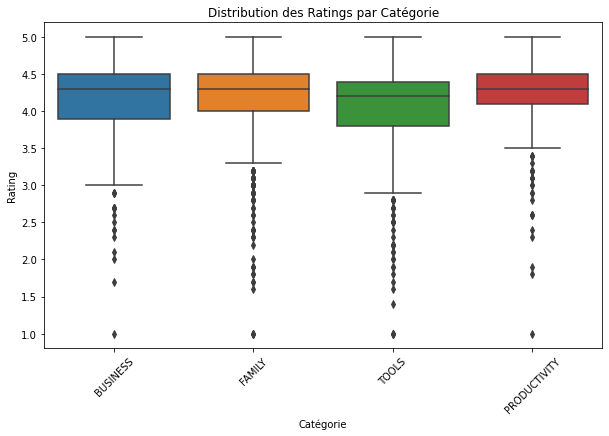

In [258]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

In [259]:
# Calculer le premier quartile (Q1) et le troisième quartile (Q3)
Q1 = df_filtered.groupby('Category')['Rating'].quantile(0.25)
Q3 = df_filtered.groupby('Category')['Rating'].quantile(0.75)

# Calcul de l'IQR pour chaque catégorie
IQR = Q3 - Q1

# Définir le seuil pour les outliers bas
threshold_low = Q1 - 1.1 * IQR

# Appliquer le filtre pour supprimer les outliers bas
for category in df_filtered['Category'].unique():
    filter_condition = (df_filtered['Category'] == category) & (df_filtered['Rating'] < threshold_low[category])
    df_filtered = df_filtered[~filter_condition]

# Prétraitement des données

In [260]:
# Convertir 'Reviews' en entier
df_filtered['Reviews'] = pd.to_numeric(df_filtered['Reviews'], errors='coerce')

# Nettoyer et convertir 'Size' en megabytes
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convertir k en M
    return 0
    # return 'Varies with device' 

df_filtered['Size'] = df_filtered['Size'].map(convert_size)

# Convertir la colonne 'Installs' en un format numérique propre pour le traitement
df_filtered['Installs'] = df_filtered['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Nettoyer et convertir 'Price' en float
df_filtered['Price'] = df_filtered['Price'].str.replace('$', '').astype(float)

# Convertir 'Last Updated' en format de date
df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'])

# Afficher les types de données modifiés et les premières lignes pour vérification
df_filtered.head(), df_filtered.dtypes

(                              App  Category  Rating  Reviews  Size  Installs  \
 187  Visual Voicemail by MetroPCS  BUSINESS     4.1    16129   0.0  10000000   
 188             Indeed Job Search  BUSINESS     4.3   674730   0.0  50000000   
 189                   Uber Driver  BUSINESS     4.4  1254730   0.0  10000000   
 190          ADP Mobile Solutions  BUSINESS     4.3    85185  29.0   5000000   
 191        Snag - Jobs Hiring Now  BUSINESS     4.3    32584   0.0   1000000   
 
      Type  Price Content Rating    Genres Last Updated         Current Ver  \
 187  Free    0.0       Everyone  Business   2018-07-30  Varies with device   
 188  Free    0.0       Everyone  Business   2018-05-21  Varies with device   
 189  Free    0.0       Everyone  Business   2018-08-03  Varies with device   
 190  Free    0.0       Everyone  Business   2018-07-17               3.4.2   
 191  Free    0.0       Everyone  Business   2018-05-04  Varies with device   
 
             Android Ver  
 187  Var

In [261]:
df_filtered.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,Free,0.0,Everyone,Business,2018-07-30,Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,Free,0.0,Everyone,Business,2018-07-17,3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,Free,0.0,Everyone,Business,2018-05-04,Varies with device,Varies with device


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


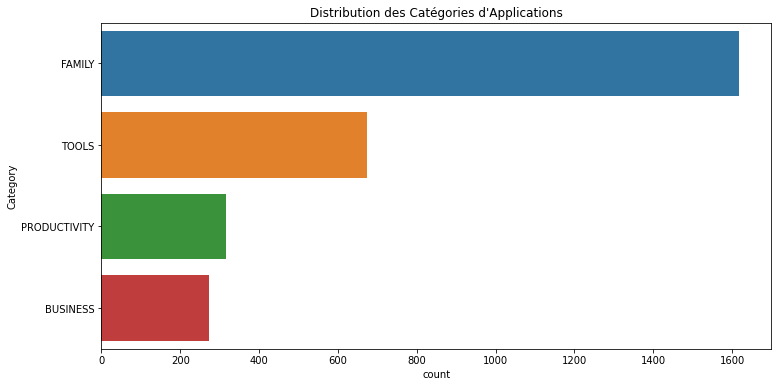

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


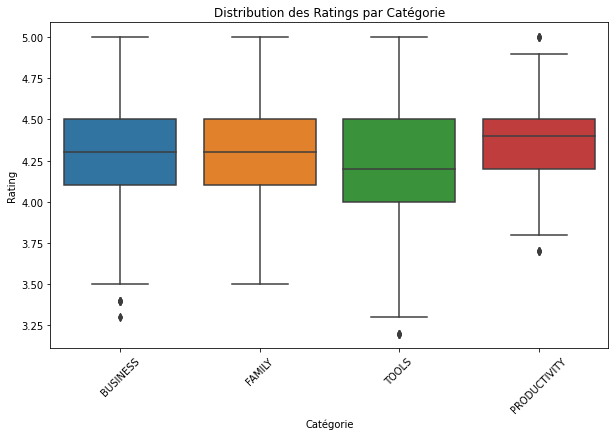

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


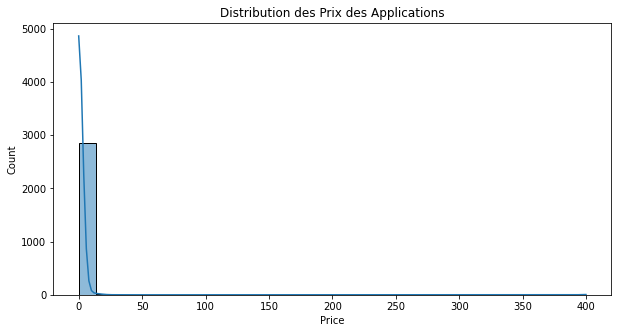

In [262]:
# Distribution des catégories d'applications
plt.figure(figsize=(12, 6))
sns.countplot(y=df_filtered['Category'], order=df_filtered['Category'].value_counts().index)
plt.title("Distribution des Catégories d'Applications")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

# Distribution des prix
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['Price'], bins=30, kde=True)
plt.title('Distribution des Prix des Applications')
plt.show()


In [263]:

# Trouver l'application la plus populaire par catégorie
most_popular_apps = df_filtered.loc[df_filtered.groupby('Category')['Installs'].idxmax()]

# # Afficher les applications les plus populaires par catégorie
print(most_popular_apps[['Category', 'App', 'Installs', 'Rating']])


          Category                                     App    Installs  Rating
194       BUSINESS  OfficeSuite : Free Office + PDF Editor   100000000     4.3
5856        FAMILY                       Google Play Games  1000000000     4.3
3454  PRODUCTIVITY                            Google Drive  1000000000     4.4
3234         TOOLS                                  Google  1000000000     4.4


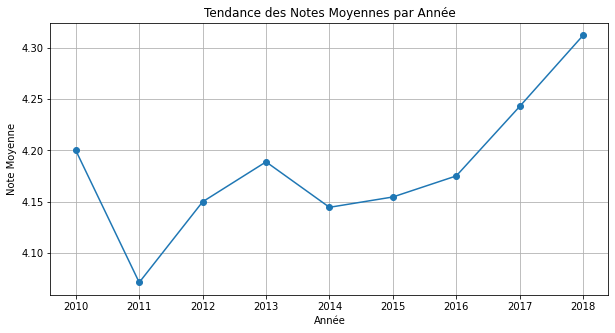

In [264]:
# Convertir 'Last Updated' en datetime
df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'])

# Calculer la moyenne des notes par année
ratings_over_time = df_filtered.groupby(df_filtered['Last Updated'].dt.year)['Rating'].mean()

# Tracer la tendance des notes au fil du temps
plt.figure(figsize=(10, 5))
ratings_over_time.plot(kind='line', marker='o')
plt.title('Tendance des Notes Moyennes par Année')
plt.xlabel('Année')
plt.ylabel('Note Moyenne')
plt.grid(True)
plt.show()


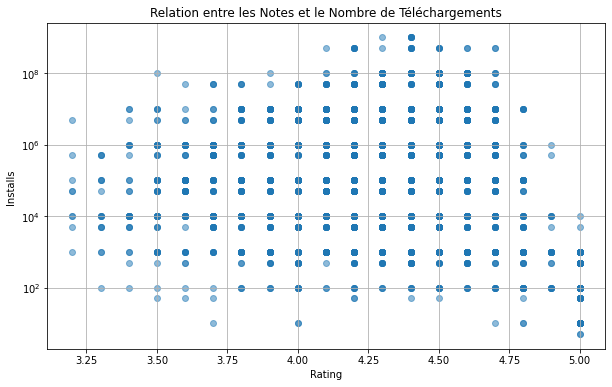

In [265]:
# Tracer un scatter plot pour examiner la relation entre les notes et le nombre de téléchargements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Rating'], df_filtered['Installs'], alpha=0.5)
plt.title('Relation entre les Notes et le Nombre de Téléchargements')
plt.xlabel('Rating')
plt.ylabel('Installs ')
plt.yscale('log')  
plt.grid(True)
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

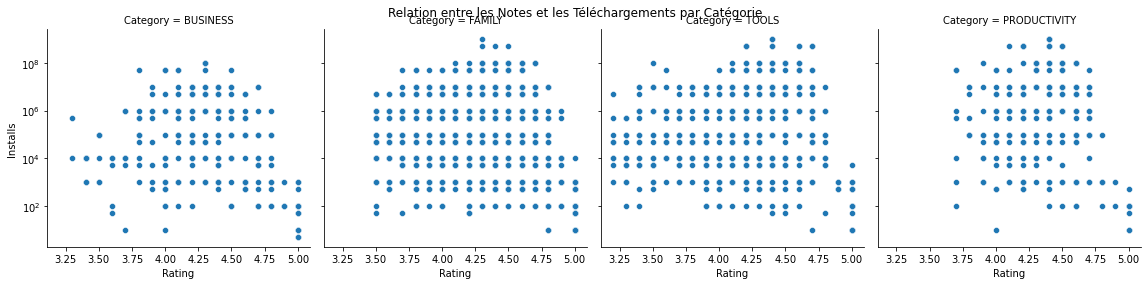

In [266]:
# Créer un scatter plot pour chaque catégorie
g = sns.FacetGrid(df_filtered, col="Category", col_wrap=4, height=4)
g.map(sns.scatterplot, "Rating", "Installs")

# Ajuster les échelles pour voir les tendances dans chaque catégorie
g.set(yscale="log")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relation entre les Notes et les Téléchargements par Catégorie')

# Afficher les graphiques
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

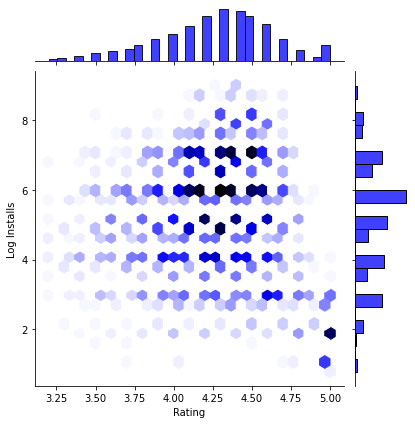

In [267]:
# Appliquer la transformation logarithmique directement aux données
df_filtered['Log Installs'] = np.log10(df_filtered['Installs'] + 1)  # Ajouter 1 pour éviter le log de zéro

# Créer un jointplot avec la transformation appliquée
sns.jointplot(x='Rating', y='Log Installs', data=df_filtered, kind='hex', color='blue')
plt.show()

In [268]:
from sklearn.preprocessing import OneHotEncoder


# Initialiser OneHotEncoder
encoder = OneHotEncoder()  # Retourne une matrice sparse par défaut

# Sélectionner les colonnes catégorielles
categorical_columns = ['Type', 'Content Rating']
categorical_data = df_filtered[categorical_columns]

# Appliquer OneHotEncoder sur les données catégorielles
encoded_data = encoder.fit_transform(categorical_data)

# Créer un DataFrame avec les données encodées à partir de la matrice sparse
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concaténer le DataFrame encodé avec les autres données
# Assurez-vous de réinitialiser l'index si nécessaire pour éviter des problèmes de concaténation
df_filtered.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
full_data = pd.concat([df_filtered, encoded_df], axis=1)

# Supprimer les colonnes catégorielles originales car elles sont maintenant remplacées par leur version encodée
full_data.drop(columns=categorical_columns, inplace=True)

# Afficher les premières lignes du nouveau DataFrame pour vérification
full_data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,0.0,Business,2018-07-30,Varies with device,Varies with device,7.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,0.0,Business,2018-05-21,Varies with device,Varies with device,7.69897,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,0.0,Business,2018-08-03,Varies with device,Varies with device,7.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,5.0 and up,6.69897,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,0.0,Business,2018-05-04,Varies with device,Varies with device,6.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [269]:
# Définir la cible en fonction des catégories d'intérêt
full_data['Target'] = full_data['Category'].apply(
    lambda x: 'Demoli' if x in ['TOOLS', 'PRODUCTIVITY'] else ('Ajmi' if x in ['FAMILY', 'BUSINESS'] else 'None')
)


In [270]:
from sklearn.model_selection import train_test_split

# Sélectionner les features et la cible
X = full_data.drop(columns=['Target', 'App', 'Category', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])  # Exclure les colonnes non numériques et la cible
y = full_data['Target']

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [271]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraîner le modèle
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [272]:
from sklearn.metrics import accuracy_score

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


Précision du modèle : 67.01%


In [274]:
# Filtrer les applications pour Mme Ajmi et M. Demoli
predictions = model.predict(full_data.drop(columns=['Target', 'App', 'Category', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']))
full_data['Prediction'] = predictions

# Afficher les résultats filtrés
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']


In [278]:
full_data[full_data['Target'] == 'Ajmi']

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,0.0,Business,2018-07-30,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
1,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,0.0,Business,2018-05-21,Varies with device,...,7.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,0.0,Business,2018-08-03,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,...,6.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,0.0,Business,2018-05-04,Varies with device,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,0.0,Education,2018-06-27,3.8.0,...,3.000434,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ajmi,Ajmi
2875,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000,0.0,Education,2018-06-13,2.0.20,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2876,FR Calculator,FAMILY,4.0,7,2.6,500,0.0,Education,2017-06-18,1.0.0,...,2.699838,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2877,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,0.0,Education,2017-07-25,1.48,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi


In [279]:
full_data[full_data['Target'] == 'Demoli']

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
335,Moto File Manager,TOOLS,4.1,38655,5.9,10000000,0.0,Tools,2018-02-01,v3.7.93,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
336,Google,TOOLS,4.4,8033493,0.0,1000000000,0.0,Tools,2018-08-03,Varies with device,...,9.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
337,Google Translate,TOOLS,4.4,5745093,0.0,500000000,0.0,Tools,2018-08-04,Varies with device,...,8.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
338,Moto Display,TOOLS,4.2,18239,0.0,10000000,0.0,Tools,2018-08-06,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
339,Motorola Alert,TOOLS,4.2,24199,3.9,50000000,0.0,Tools,2014-11-21,1.02.53,...,7.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,ChopAssistant,TOOLS,4.2,455,2.8,50000,0.0,Tools,2017-02-28,1.6,...,4.698979,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2864,Reindeer VPN - Proxy VPN,TOOLS,4.2,7339,4.0,100000,0.0,Tools,2018-05-10,1.74,...,5.000004,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2865,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,7.8,1000000,0.0,Tools,2018-07-26,1.9.734,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2866,FR Roster,TOOLS,4.1,174,12.0,5000,0.0,Tools,2018-07-30,6.04,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi


In [280]:
from sklearn.neighbors import KNeighborsClassifier

# Initialiser le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [281]:
# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [282]:
from sklearn.metrics import accuracy_score

# Prédire sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN : {:.2f}%".format(accuracy * 100))


Précision du modèle KNN : 60.07%


In [283]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Standardiser les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner à nouveau le modèle KNN avec les données standardisées
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Précision après standardisation : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Précision après standardisation : 72.40%


In [284]:
from sklearn.model_selection import GridSearchCV

# Grille de paramètres à tester
param_grid = {'n_neighbors': range(1, 20)}

# Recherche par grille avec validation croisée
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Meilleur nombre de voisins
print("Meilleur nombre de voisins:", knn_cv.best_params_)
print("Meilleure précision obtenue : {:.2f}%".format(knn_cv.best_score_ * 100))


Meilleur nombre de voisins: {'n_neighbors': 19}
Meilleure précision obtenue : 76.29%


In [285]:
# Tester avec la distance de Manhattan
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
print("Précision avec Manhattan : {:.2f}%".format(accuracy_score(y_test, y_pred_manhattan) * 100))


Précision avec Manhattan : 72.40%


In [286]:
from sklearn.feature_selection import SelectKBest

# Sélectionner les K meilleures caractéristiques
selector = SelectKBest(k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Réentraîner le modèle
knn.fit(X_train_selected, y_train)
y_pred_selected = knn.predict(X_test_selected)
print("Précision avec les caractéristiques sélectionnées : {:.2f}%".format(accuracy_score(y_test, y_pred_selected) * 100))


Précision avec les caractéristiques sélectionnées : 72.40%


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [287]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer le modèle d'arbre de décision
tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limiter la profondeur de l'arbre pour éviter le surajustement

# Entraîner le modèle
tree.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de l'arbre de décision : {:.2f}%".format(accuracy * 100))

# Utiliser le modèle pour filtrer les applications selon les intérêts
full_data['Prediction'] = tree.predict(X)

# Filtrer et afficher les résultats
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']
print(filtered_apps_demoli.head())
print(filtered_apps_ajmi.head())

Précision de l'arbre de décision : 75.69%
                             App  Category  Rating  Reviews  Size  Installs  \
0   Visual Voicemail by MetroPCS  BUSINESS     4.1    16129   0.0  10000000   
1              Indeed Job Search  BUSINESS     4.3   674730   0.0  50000000   
2                    Uber Driver  BUSINESS     4.4  1254730   0.0  10000000   
4         Snag - Jobs Hiring Now  BUSINESS     4.3    32584   0.0   1000000   
5  Docs To Go™ Free Office Suite  BUSINESS     4.1   217730   0.0  50000000   

   Price    Genres Last Updated         Current Ver  ... Log Installs  \
0    0.0  Business   2018-07-30  Varies with device  ...      7.00000   
1    0.0  Business   2018-05-21  Varies with device  ...      7.69897   
2    0.0  Business   2018-08-03  Varies with device  ...      7.00000   
4    0.0  Business   2018-05-04  Varies with device  ...      6.00000   
5    0.0  Business   2018-04-02  Varies with device  ...      7.69897   

   Type_Free  Type_Paid  Content Rating_Ever

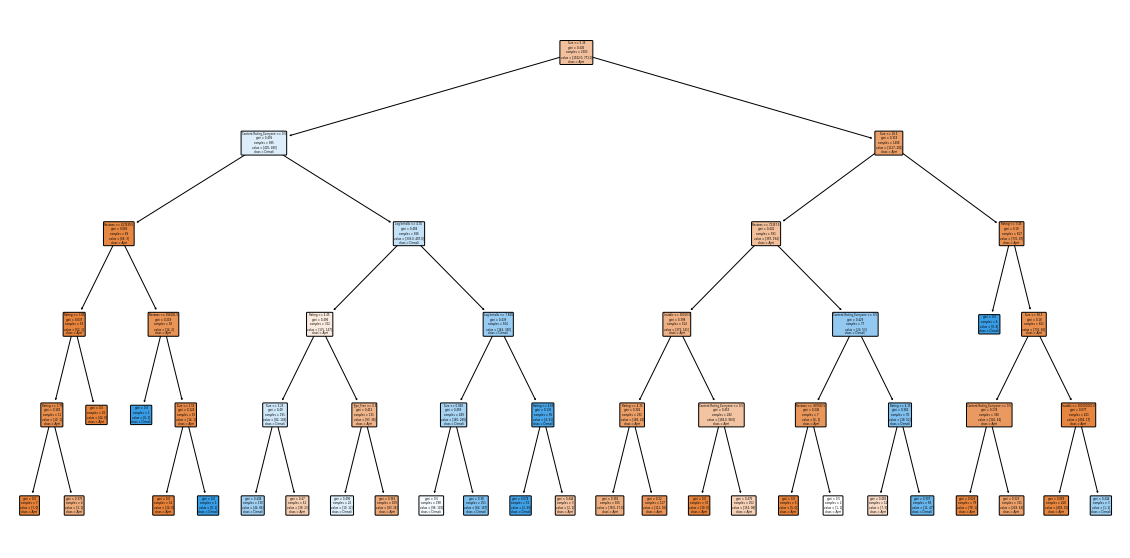

In [288]:
from sklearn.tree import plot_tree

# Supposons que 'tree' est votre modèle d'arbre de décision entraîné
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ajmi', 'Demoli', 'None'], rounded=True)
plt.show()

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer le modèle d'arbre de décision
tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiter la profondeur de l'arbre pour éviter le surajustement

# Entraîner le modèle
tree.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de l'arbre de décision : {:.2f}%".format(accuracy * 100))

# Utiliser le modèle pour filtrer les applications selon les intérêts
full_data['Prediction'] = tree.predict(X)

# Filtrer et afficher les résultats
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']
print(filtered_apps_demoli.head())
print(filtered_apps_ajmi.head())

Précision de l'arbre de décision : 71.88%
                             App  Category  Rating  Reviews  Size  Installs  \
0   Visual Voicemail by MetroPCS  BUSINESS     4.1    16129   0.0  10000000   
1              Indeed Job Search  BUSINESS     4.3   674730   0.0  50000000   
2                    Uber Driver  BUSINESS     4.4  1254730   0.0  10000000   
4         Snag - Jobs Hiring Now  BUSINESS     4.3    32584   0.0   1000000   
5  Docs To Go™ Free Office Suite  BUSINESS     4.1   217730   0.0  50000000   

   Price    Genres Last Updated         Current Ver  ... Log Installs  \
0    0.0  Business   2018-07-30  Varies with device  ...      7.00000   
1    0.0  Business   2018-05-21  Varies with device  ...      7.69897   
2    0.0  Business   2018-08-03  Varies with device  ...      7.00000   
4    0.0  Business   2018-05-04  Varies with device  ...      6.00000   
5    0.0  Business   2018-04-02  Varies with device  ...      7.69897   

   Type_Free  Type_Paid  Content Rating_Ever

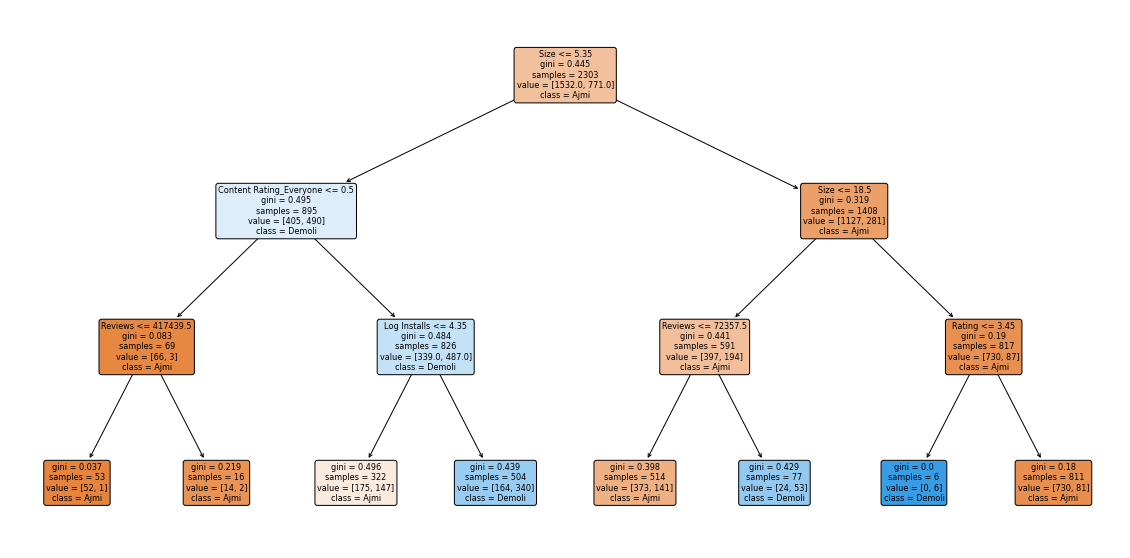

In [290]:
from sklearn.tree import plot_tree

# Supposons que 'tree' est votre modèle d'arbre de décision entraîné
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ajmi', 'Demoli', 'None'], rounded=True)
plt.show()